# IS 362 - Week 12 Assignment

In [1]:
# Import libraries

import pandas as pan
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline

In [2]:
# Assign names to the columns based on the .names file from the UCI website

columns = ['class','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gill-spacing','gill-size',
           'gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
           'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type',
           'spore-print-color','population','habitat']

# Read the data from UCI into the dataframe  

mushroom_data = pan.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', 
                           names=columns)

### First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there!

In [3]:
# Display the information in the dataframe

mushroom_data

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.

### Add meaningful names for each column.

### Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1.

In [4]:
# Create dictionaries for mapping class, odor, and cap-color columns

toxicity = {'numeric': {'e': 0, 'p': 1}, 
            'name':{0: 'edible', 1: 'poisonous'}}

odor = {'numeric': {'a': 0, 'l': 1, 'c': 2, 'y': 3, 'f': 4,'m': 5, 'n':6, 'p':7, 's':8,},
        'name': {0: 'almond', 1: 'anise', 2: 'creosote', 3: 'fishy', 4: 'foul', 5: 'musty', 6: 'none', 7: 'pungent', 
                 8: 'spicy'}}

cap_color = {'numeric': {'n': 0, 'b': 1, 'c': 2, 'g': 3, 'r': 4, 'p': 5, 'u': 6, 'e': 7, 'w': 8, 'y': 9}, 
             'name': {0: 'brown', 1: 'buff', 2: 'cinnamon', 3: 'gray', 4: 'green', 5: 'pink', 6: 'purple', 7: 'red', 
                      8: 'white', 9: 'yellow'}}

In [5]:
# Map the codes in the class, odor, and cap-color columns to numeric values with dictionary
# Map class-name, odor-name, and cap-color-name to new columns with dictionary

mushroom_data['class'] = mushroom_data['class'].map(toxicity['numeric'])
mushroom_data['class-name'] = mushroom_data['class'].map(toxicity['name'])
mushroom_data['odor'] = mushroom_data['odor'].map(odor['numeric'])
mushroom_data['odor-name'] = mushroom_data['odor'].map(odor['name'])
mushroom_data['cap-color'] = mushroom_data['cap-color'].map(cap_color['numeric'])
mushroom_data['cap-color-name'] = mushroom_data['cap-color'].map(cap_color['name'])

In [6]:
# Display the information in the dataframe, listing only a subset of columns

mushroom_data[['class', 'class-name','odor', 'odor-name', 'cap-color', 'cap-color-name']]

,class,class-name,odor,odor-name,cap-color,cap-color-name
0,1,poisonous,7,pungent,0,brown
1,0,edible,0,almond,9,yellow
2,0,edible,1,anise,8,white
3,1,poisonous,7,pungent,8,white
4,0,edible,6,none,3,gray
...,...,...,...,...,...,...
8119,0,edible,6,none,0,brown
8120,0,edible,6,none,0,brown
8121,0,edible,6,none,0,brown
8122,1,poisonous,3,fishy,0,brown


### Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.

Text(0, 0.5, 'Count')

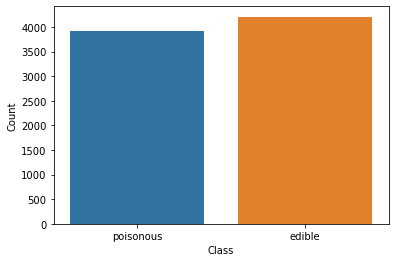

In [7]:
# Create a count plot to show distribution of poisonous/edible mushrooms 

sns.countplot(x='class-name', data=mushroom_data)
plot.xlabel('Class')
plot.ylabel('Count')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'pungent'),
  Text(1, 0, 'almond'),
  Text(2, 0, 'anise'),
  Text(3, 0, 'none'),
  Text(4, 0, 'foul'),
  Text(5, 0, 'creosote'),
  Text(6, 0, 'fishy'),
  Text(7, 0, 'spicy'),
  Text(8, 0, 'musty')])

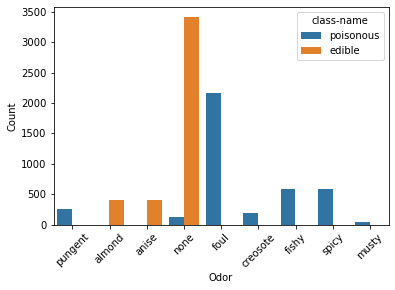

In [8]:
# Create a count plot to show distribution of odors

sns.countplot(data=mushroom_data, x='odor-name', hue="class-name")
plot.xlabel('Odor')
plot.ylabel('Count')
plot.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'brown'),
  Text(1, 0, 'yellow'),
  Text(2, 0, 'white'),
  Text(3, 0, 'gray'),
  Text(4, 0, 'red'),
  Text(5, 0, 'pink'),
  Text(6, 0, 'buff'),
  Text(7, 0, 'purple'),
  Text(8, 0, 'cinnamon'),
  Text(9, 0, 'green')])

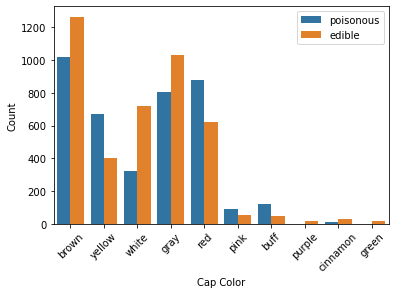

In [9]:
# Create count plot to show distribution of cap colors

sns.countplot(data=mushroom_data, x='cap-color-name', hue='class-name')
plot.xlabel('Cap Color')
plot.ylabel('Count')
plot.legend(loc='upper right')
plot.xticks(rotation=45)

([<matplotlib.axis.XTick at 0x26ffa568b80>,
 [Text(0, 0, ''), Text(0, 0, '')])

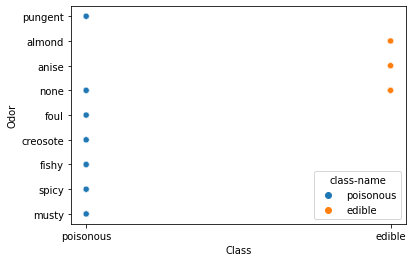

In [10]:
# Create scatterplot for edible/poisonous vs. odor

sns.scatterplot(data=mushroom_data, x="class-name", y="odor-name", hue='class-name')
plot.xlabel('Class')
plot.ylabel('Odor')
plot.xticks([0,1])

([<matplotlib.axis.XTick at 0x26ffa5d0c10>,
 [Text(0, 0, ''), Text(0, 0, '')])

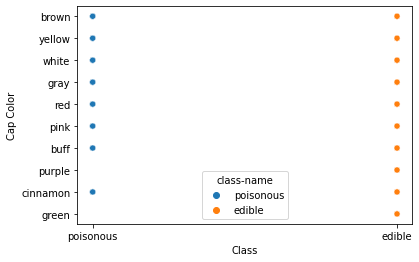

In [11]:
# Create scatterplot for edible/poisonous vs. cap color

sns.scatterplot(data=mushroom_data, x="class-name", y="cap-color-name", hue='class-name')
plot.xlabel('Class')
plot.ylabel('Cap Color')
plot.xticks([0,1])

### Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous.

Based on the data, odor is a helpful indicator for predicting whether a specific mushroom is edible or poisonous, with all almond- and anise-scented mushrooms and the majority of unscented mushrooms being edible. Cap color is helpful, but less so than odor, for predicting whether a specific mushroom is edible or poisonous. With the exception of purple and green mushrooms, which are all edible, mushrooms in the other listed colors may fall into either category. However, mushrooms that are yellow, red, pink, or buff in color should best be avoided as there are more poisonous mushrooms in those colors than edible ones. 